In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
transaction_df = pd.read_csv('transaction_data.csv')

In [3]:
transaction_df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
transaction_df.shape

(5315, 3)

In [5]:
transaction_df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [14]:
transaction_df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [12]:
transaction_df[transaction_df.isnull()].shape[0]

5315

In [13]:
transaction_df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [18]:
transaction = transaction_df.groupby('transaction', as_index=False).agg({'name':'count'}).rename(columns={'name':'count'})
transaction

,transaction,count
0,cancelled,1619
1,error,4
2,successfull,3692


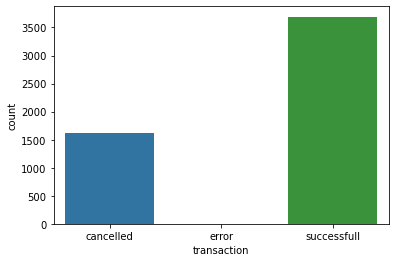

In [22]:
ax = sns.barplot(x='transaction', y='count', data=transaction)

In [31]:
successful_transcation_per_person = transaction_df.query('transaction == "successfull"') \
    .groupby('name') \
    .agg({'date': 'count'}) \
    .rename(columns={'date': 'count_purch'})
successful_transcation_per_person.head().count_purch.describe()

count     5.000000
mean     66.800000
std       5.718391
min      59.000000
25%      63.000000
50%      68.000000
75%      72.000000
max      72.000000
Name: count_purch, dtype: float64

<AxesSubplot:xlabel='count_purch', ylabel='Count'>

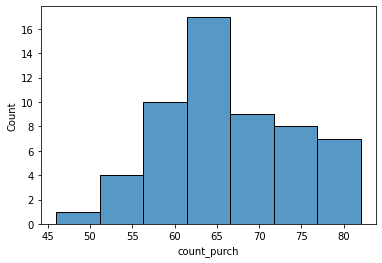

In [29]:
sns.histplot(data=successful_transcation_per_person, x='count_purch')

In [32]:
#Построение сводной таблицы

In [39]:
transaction_df_upd = pd.read_csv('transaction_data_updated.csv')
transaction_df_upd.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [69]:
transaction_pivot = transaction_df_upd.groupby(['name', 'minute'], as_index=False) \
    .agg({'date':'count'}).rename(columns={'date':'quantity'})
transaction_pivot = transaction_pivot.fillna(0)

In [72]:
transaction_pivot.isnull().any()

name        False
minute      False
quantity    False
dtype: bool

In [70]:
transaction_df_upd.head()

,date,name,transaction,minute,quantity
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,0.0
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,0.0
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,0.0
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,0.0
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,0.0


In [76]:
transaction_pivot = transaction_pivot.fillna(0)
user_vs_minute_pivot = transaction_pivot.pivot(index='minute', columns='name', values='quantity').fillna(0)

<AxesSubplot:xlabel='minute', ylabel='Count'>

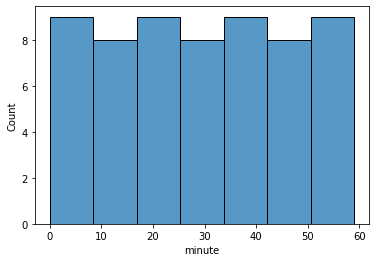

In [79]:
sns.histplot(data=user_vs_minute_pivot, x='minute')

In [83]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


<AxesSubplot:xlabel='minute'>

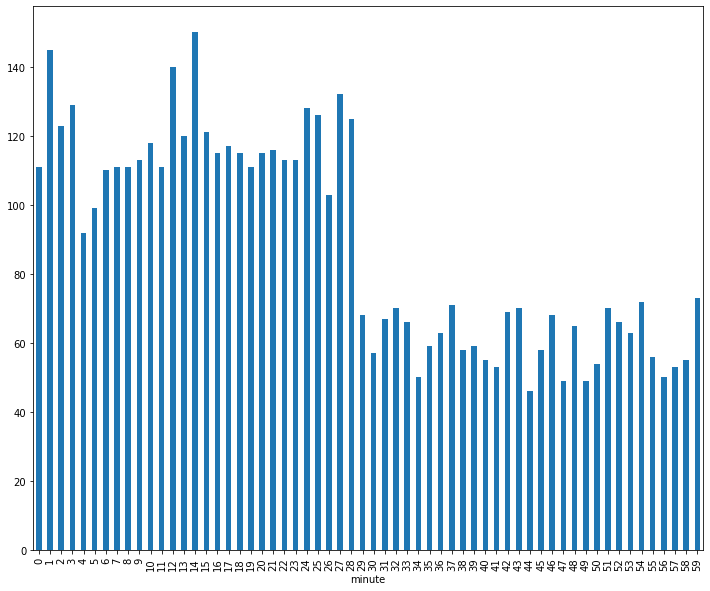

In [96]:
plt.figure(figsize=(12,10))
user_vs_minute_pivot.sum(axis=1).plot(kind='bar')

In [97]:
transaction_df_upd.head()

,date,name,transaction,minute,quantity
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,0.0
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,0.0
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,0.0
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,0.0
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,0.0


In [99]:
transaction_df_upd.date = pd.to_datetime(transaction_df_upd.date)

In [102]:
transaction_df_upd.head()

,date,name,transaction,minute,quantity,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,0.0,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,0.0,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,0.0,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,0.0,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,0.0,17


In [108]:
transaction_df_upd['true_minute'] = transaction_df_upd.date.dt.minute + 60*transaction_df_upd.date.dt.hour
transaction_df_upd.query('true_minute > 60')

,date,name,transaction,minute,quantity,true_minute
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,0.0,66
5,2020-03-02 01:09:55,Irina_Polyanova,cancelled,9,0.0,69
10,2020-03-02 01:20:50,Irina_Smirnova,successfull,20,0.0,80
12,2020-03-02 01:01:48,Masha_Ozerova,successfull,1,0.0,61
13,2020-03-02 01:04:03,Lolita_Polyanova,cancelled,4,0.0,64
...,...,...,...,...,...,...
5304,2020-03-02 01:26:54,Irina_Petrova,successfull,26,0.0,86
5307,2020-03-02 01:14:11,Masha_Ozerova,successfull,14,0.0,74
5308,2020-03-02 01:12:14,Ekaterina_Ivanova,successfull,12,0.0,72
5309,2020-03-02 01:26:13,Olga_Ozerova,successfull,26,0.0,86


In [103]:
transaction_pivot_true = transaction_df_upd.groupby(['name', 'true_minute'], as_index=False) \
    .agg({'date':'count'}).rename(columns={'date':'quantity'})
user_vs_minute_pivot_true = transaction_pivot_true.pivot(index='true_minute', columns='name', values='quantity').fillna(0)

<AxesSubplot:xlabel='true_minute'>

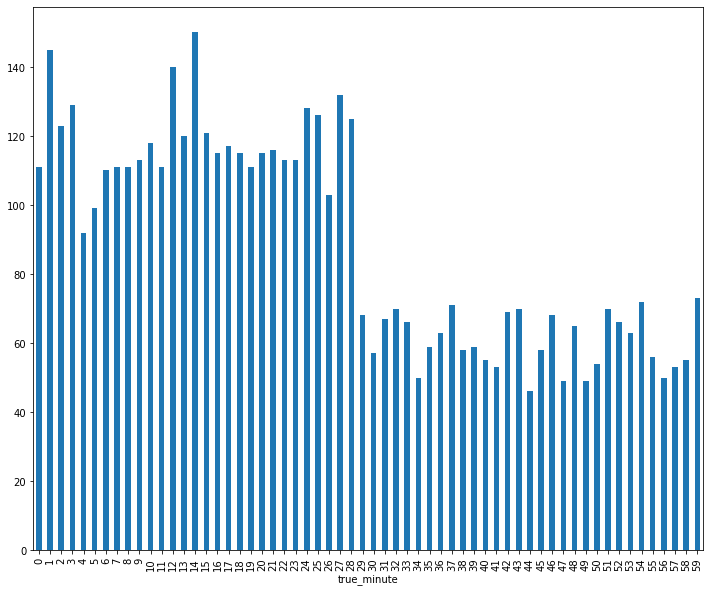

In [104]:
plt.figure(figsize=(12,10))
user_vs_minute_pivot_true.sum(axis=1).plot(kind='bar')

In [106]:
user_vs_minute_pivot_true is user_vs_minute_pivot
#Изменения произошли

False